#Objectives#



*   The main goal of this notebook is to build a machine learning system that can predict GLD (gold) prices based on several other stock prices.
*   Obtain data insights using pandas.


*   Find the correlation of the other features with GLD (gold) stock price.
*   Predict the GLD (gold) price by splitting the data and evaluate the model.





#Importing libraries#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from math import sqrt

In [ ]:
# Importing drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the csv data to a Pandas DataFrame

dataset = pd.read_csv('/content/drive/MyDrive/Capstone project/gld_price_data.csv')

In [ ]:
dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
# print first 5 rows in the dataframe

dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe

dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns

dataset.shape

(2290, 6)

In [ ]:
dataset.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

##**Data** **set** **columns**##

*   Date - mm/dd/yyyy

*   SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United State

*  GLD - Gold Price
*  USO - United States Oil Fund


* SLV - Silver Price


*  EUR/USD - currency pair quotation of the Euro against the USD



#EDA#

In [ ]:
# getting some basic informations about the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2285    False
2286    False
2287    False
2288    False
2289    False
Length: 2290, dtype: bool

In [ ]:
dataset.dropna()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
# checking the number of missing values

dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data

dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#PLOTS#

<function matplotlib.pyplot.show>

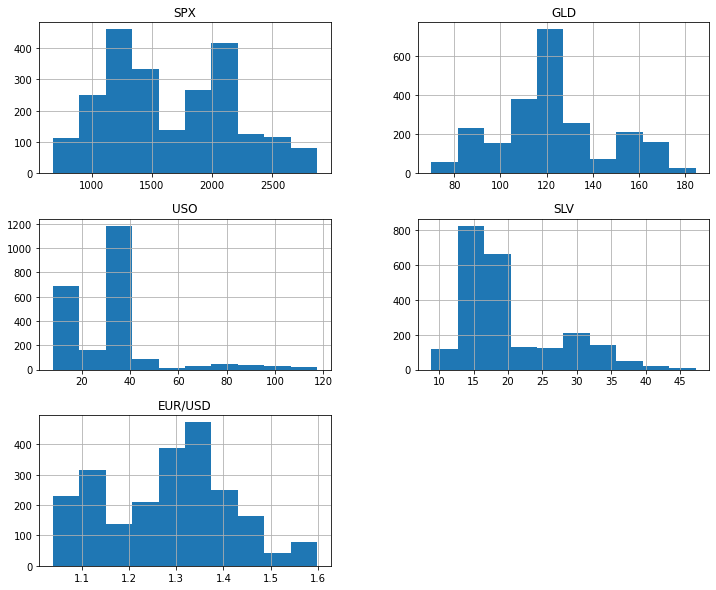

In [ ]:
#Histogram
dataset.hist(figsize=(12,10));
plt.show

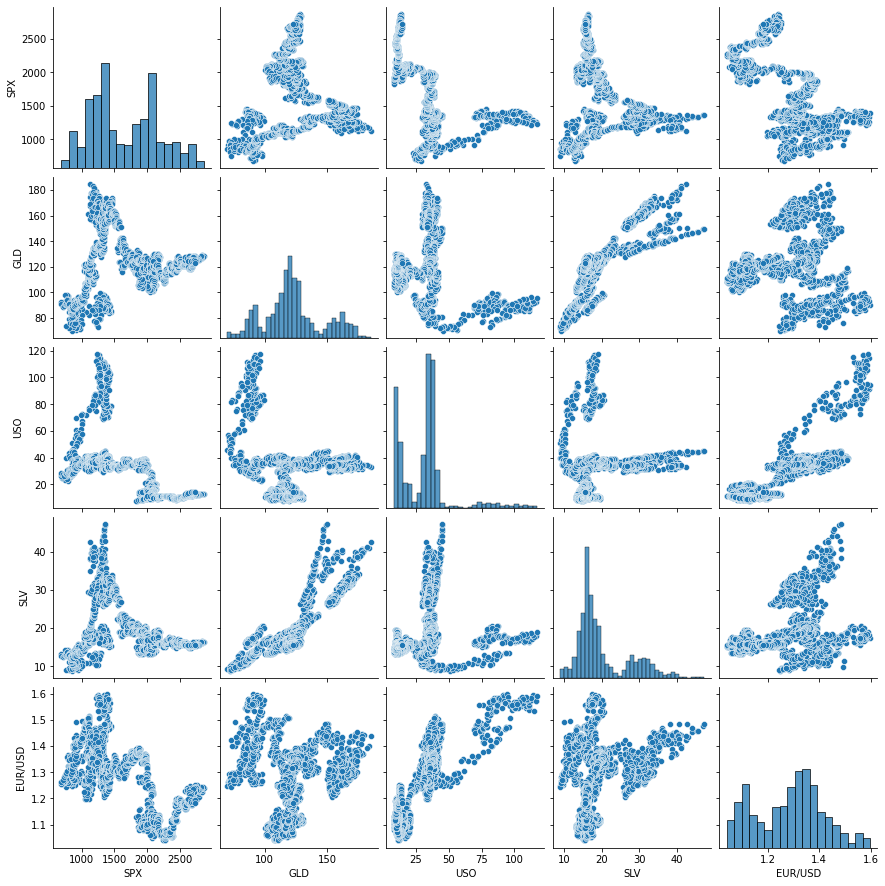

In [ ]:
#Pair Plot

sns.pairplot(dataset)
plt.show()

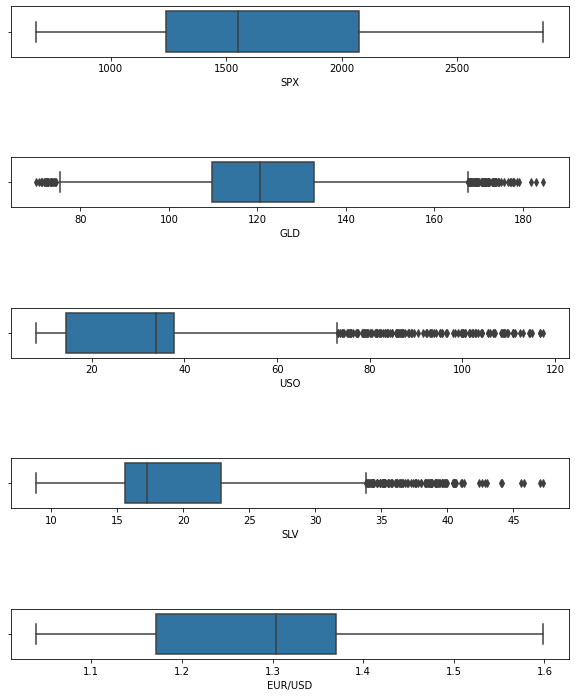

In [ ]:
#Box plot 

import warnings
warnings.filterwarnings('ignore') 

cols = ['SPX','GLD','USO','SLV','EUR/USD']
fig ,ax = plt.subplots(ncols=1,nrows=len(cols),figsize=(10,12))
for i in range(len(cols)):
    sns.boxplot(dataset[cols[i]],ax = ax[i])
plt.subplots_adjust(hspace=2)
plt.show()

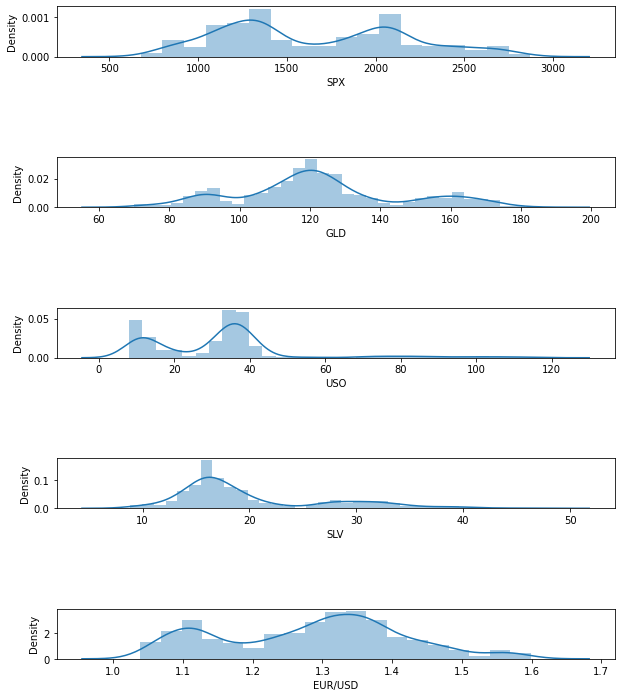

In [ ]:
#Distplot for SPX,GLD,USO,SLV,EUR/USD


import warnings
warnings.filterwarnings('ignore') 

cols = ['SPX','GLD','USO','SLV','EUR/USD']
fig ,ax = plt.subplots(ncols=1,nrows=len(cols),figsize=(10,12))
for i in range(len(cols)):
    sns.distplot(dataset[cols[i]],ax = ax[i])
plt.subplots_adjust(hspace=2)
plt.show()

In [ ]:
# change date columns to datetime create year column 

dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year

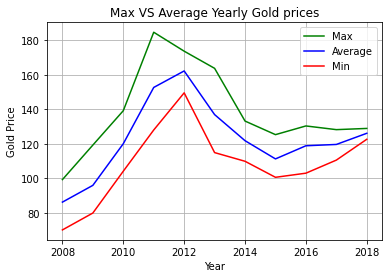

In [ ]:
# plot Max VS Average yearly Gold prices

dataset.groupby('Year').max()['GLD'].plot(color = 'green',label = 'Max')
dataset.groupby('Year').mean()['GLD'].plot(color = 'blue',label = 'Average')
dataset.groupby('Year').min()['GLD'].plot(color = 'red',label = 'Min')
plt.ylabel('Gold Price')
plt.legend()
plt.title("Max VS Average Yearly Gold prices")
plt.grid()
plt.show();

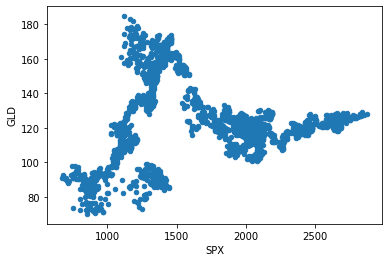

In [ ]:
#Scatter Plot 
dataset.plot(kind='scatter', x='SPX', y='GLD')

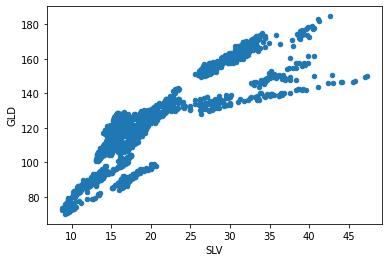

In [ ]:
dataset.plot(kind='scatter', x='SLV', y='GLD')

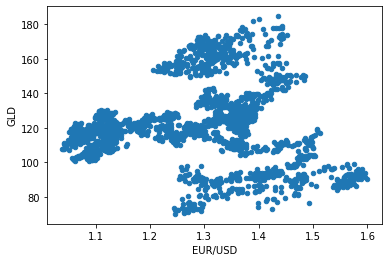

In [ ]:
dataset.plot(kind='scatter', x='EUR/USD', y='GLD')

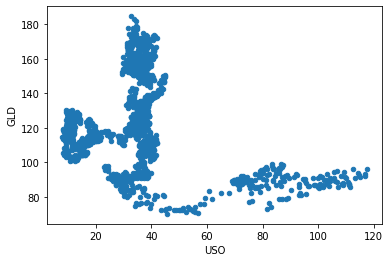

In [ ]:
dataset.plot(kind='scatter',x='USO',y='GLD')

#CORRELATION#



   1.Positive Correlation - if 1 value increases other value also increases. A correlation of 1.0 indicates a perfect positive correlation.


   2.Negative Correlation -  if 1 value increases other value decreases. A correlation of -1.0 indicates a perfect negative correlation.

In [ ]:
drop_year= dataset.drop(["Year"], axis = 1)
drop_year

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
#Drop Year in dataset
correlation = drop_year.corr()

Text(0.5, 1.0, 'Heat for Correlation')

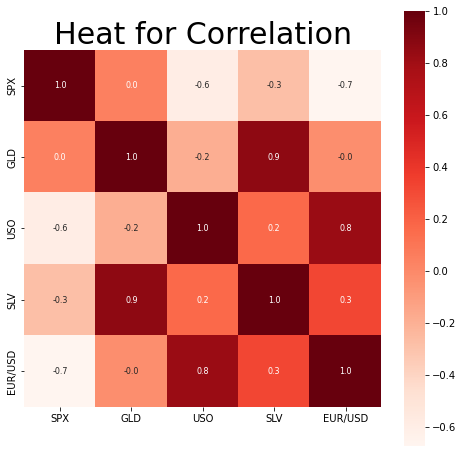

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')
plt.title("Heat for Correlation",{'size':30})


Conclusion:



*  Gold (GLD) and silver (SLV) are highly corelated to each other -> 0.9
*   Gold (GLD) and Standard and Poor's 500 (SPX) are zero correlation -> 0.0

*   Rest features expect gold (GLD) are negative correlated with respect to gold (GLD) -> -0.0 & -0.2






In [ ]:
# correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


#Linear Regression#

**Splitting the Features and Target**

In [ ]:
X = dataset.drop(['Date','Year','GLD'],axis=1)
Y = dataset['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting into Training data and Test Data**


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
model1 = LinearRegression()

In [ ]:
# training the model

model1.fit(X_train,Y_train)

LinearRegression()

#Model Evaluation#

In [ ]:
# prediction on Test Data
test_data_prediction = model1.predict(X_test)

In [ ]:
print(test_data_prediction)

[159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.85896766 119.69577146
 120.03159609 1

In [ ]:
# Evaluate model

Rmse =metrics.mean_squared_error(Y_test, test_data_prediction)
r_2 = metrics.r2_score(Y_test, test_data_prediction)

print (f'R-Squared error = {r_2}')
print('RMSE : ',Rmse)

R-Squared error = 0.8657886565869237
RMSE :  70.7889007972153


In [ ]:
Y_test = list(Y_test)

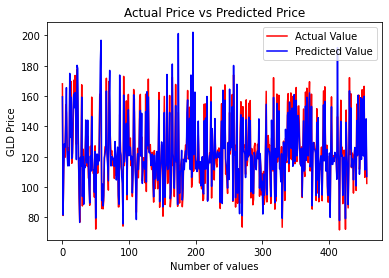

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

##Linear regression using OLS##

In [ ]:
X = dataset.drop(['Date','Year','GLD'],axis=1)
Y = dataset['GLD']

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.20, random_state=10)

In [ ]:
# a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable;
OLS_model = LinearRegression()


In [ ]:
# fit the model
OLS_model.fit(Xtrain, Ytrain)

LinearRegression()

In [ ]:
# predict the values
y_pred_OLS = OLS_model.predict(Xtest)

In [ ]:
# compute the R-Squared
r_squared_OLS = OLS_model.score(Xtrain,Ytrain)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(Ytest, y_pred_OLS))
print('R-square:',r_squared_OLS)
print("RMSE_OLS:",rmse_OLS)

R-square: 0.8792902894467479
RMSE_OLS: 8.311214915731478


In [ ]:
Y_test = list(Y_test)

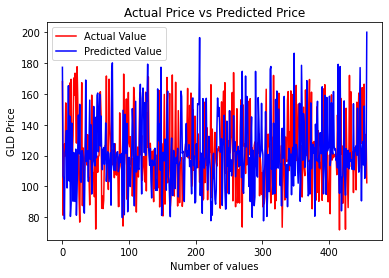

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot( y_pred_OLS, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

##Linear regression using Stochastic Gradient Descent (SGD)##

In [ ]:
# build the model
SGD_model = SGDRegressor()

# fit the model
SGD_model.fit(Xtrain, Ytrain)

SGDRegressor()

In [ ]:
# predict the values
y_pred_SGD  = SGD_model.predict(Xtest)

In [ ]:
# compute the R-Squared
r_squared_SGD = SGD_model.score(Xtrain,Ytrain)

# Compute RMSE
rmse_SGD = sqrt(mean_squared_error(Ytest, y_pred_SGD))
print('R-square_SGD:',r_squared_SGD)
print("RMSE_SGD:",rmse_SGD)

R-square_SGD: -8.22394680860688e+26
RMSE_SGD: 657885958354853.5


In [ ]:
Ytest = list(Ytest)

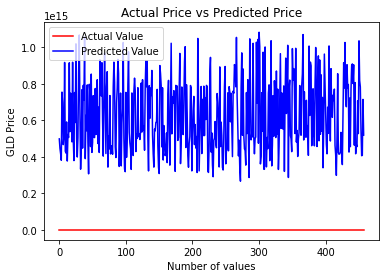

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot( y_pred_SGD, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

##Random Forest Regressor##

In [ ]:
X = dataset.drop(['Date','Year','GLD'],axis=1)
Y = dataset['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# prediction on Test Data
test_prediction = regressor.predict(X_test)

In [ ]:
print(test_prediction)

[168.79479965  81.9693002  115.90440012 127.68610103 120.51870108
 154.79739803 150.09379837 126.18070002 117.53839868 125.96710081
 116.74820112 172.06260034 141.14559877 168.30299876 115.19850004
 117.75960082 139.19200319 169.87180087 159.23120266 162.69479929
 155.12349951 125.0424999  176.36959956 157.6439032  125.20060049
  93.64149927  76.89020041 120.65879987 119.06069928 167.47700035
  88.1744008  124.98190041  91.08230072 117.58030001 121.10389942
 136.43990075 115.47280147 115.41180071 147.10070007 107.18890119
 104.22180231  87.22069826 126.41270046 117.87590042 152.57089928
 119.5072001  108.35730001 107.99799788  93.10770043 127.28589733
  74.7725004  113.79219933 121.0307004  111.21569938 118.8560988
 120.65099928 159.66329994 166.97050111 146.88739649  85.97469874
  94.40920019  86.78659885  90.46090029 119.0088006  126.49810056
 127.59979979 169.90180004 122.23879917 117.54769856  98.50660026
 168.26180043 142.8705985  132.55810236 121.08830232 121.4183994
 119.8774005

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898783368057119


In [ ]:
mean=metrics.mean_squared_error(Y_test, test_prediction )
print('RMSE :',mean)

RMSE : 5.338605467631995


In [ ]:
Y_test = list(Y_test)

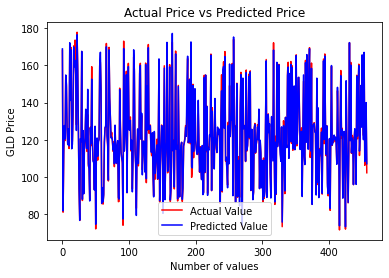

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot( test_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

##DecisionTreeRegressor##

In [ ]:
X = dataset.drop(['Date','Year','GLD'],axis=1)
Y = dataset['GLD']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
# training the model
reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
# prediction on Test Data
test_data = regressor.predict(X_test)

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data)
print("R squared error : ", error_score)

R squared error :  0.9898783368057119


In [ ]:
meee=metrics.mean_squared_error(Y_test, test_data )
print('RMSE : ',meee)

RMSE :  5.338605467631995


In [ ]:
Y_test = list(Y_test)

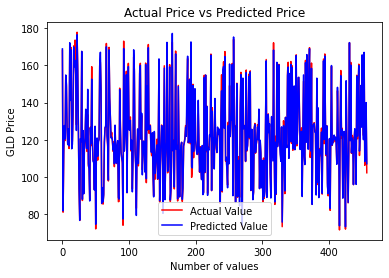

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot( test_data, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()